โหลด Library Package ที่ต้องใช้

In [21]:
import pandas as pd
import numpy as np
import statsmodels
import fix_yahoo_finance as yf
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import monthly_returns_heatmap as mrh
import matplotlib.dates as dates
import bt

กำหนด Tickerของหุ้น , ระยะของวันที่ต้องการดูค่า โหลดข้อมูลเก็บใน Dataframe แล้วดึงเอาเฉพาะราคาปิด

In [22]:
tickers='^GSPC'   #SP500 index
datestart='2000-01-01'
enddate=pd.to_datetime('now')
data=pdr.get_data_yahoo(tickers,datestart,enddate)
data=pd.concat([data['Close'].loc[datestart: ]]
               ,axis=1,keys=['Close']) #ดึงเอาเฉพาะราคาปิด

https://query1.finance.yahoo.com/v7/finance/download/^GSPC?period1=946659600&period2=1500929769&interval=1d&events=history&crumb=RC8qSsgp4kX


Plot กราฟราคาปิด

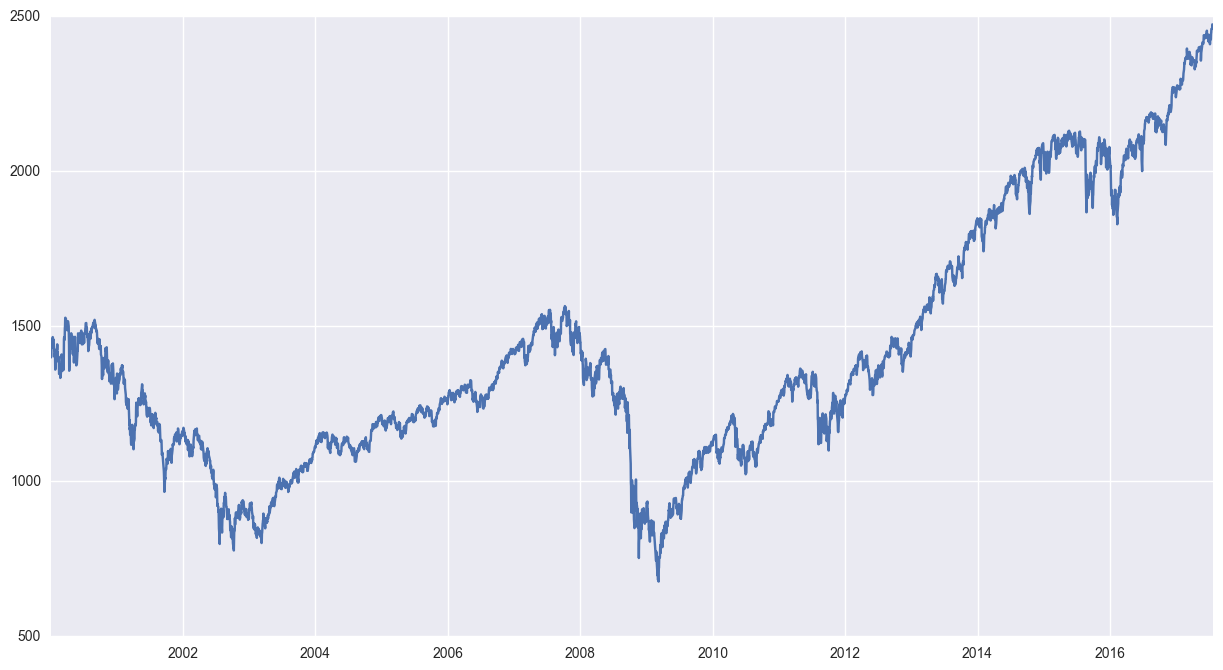

In [23]:
plt.figure(figsize=(15,8));
plt.plot(data);

หาค่า Percentile ของราคา

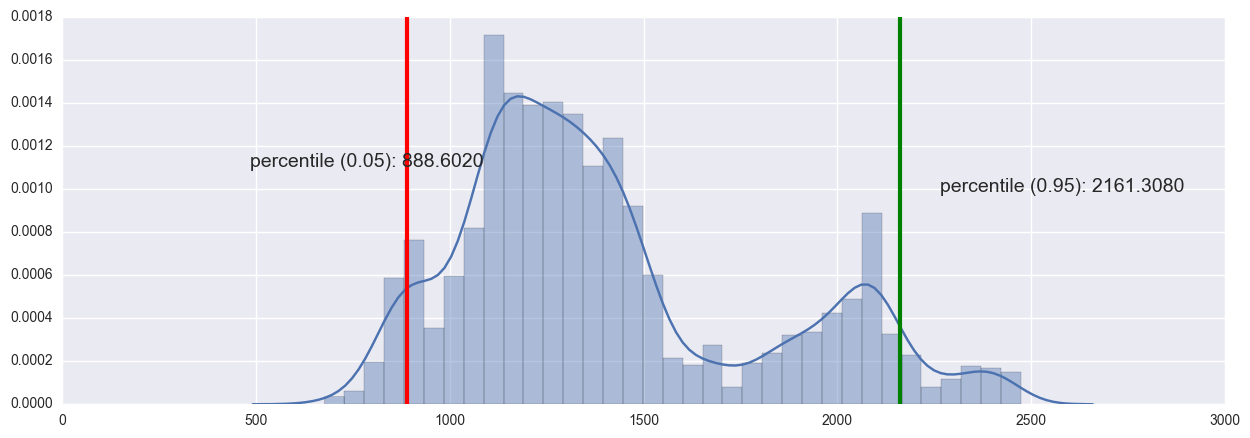

In [24]:
plt.figure(figsize=(15,5))
#plt.subplot (221);
sns.distplot(data);
p=np.percentile(data,5)
q=np.percentile(data,95)
plt.axvline(x=p, linewidth=3,color='r');
plt.axvline(x=q, linewidth=3,color='g');
plt.figtext(0.25,0.6,"percentile (0.05): %.4f" % p,fontsize=14);
plt.figtext(0.71,0.55,"percentile (0.95): %.4f" % q,fontsize=14);

คำนวนหาค่า Return ต่างๆ

In [25]:
dailyreturn=pd.concat([data['Close'].pct_change(1)]
                      ,axis=1,keys=['DailyReturn'])
monthlyreturn=pd.concat([data['Close'].pct_change(21)]
                      ,axis=1,keys=['MonthlyReturn'])
annualreturn=pd.concat([data['Close'].pct_change(252)]
                      ,axis=1,keys=['AnnualReturn'])

เก็บค่า Return ใน Dataframe เดียวกัน

In [26]:
datareturn=pd.concat([data['Close'],dailyreturn,monthlyreturn,annualreturn],
                    axis=1)                   

In [27]:
datareturn.tail(10)

,Close,DailyReturn,MonthlyReturn,AnnualReturn
Date,,,,
2017-07-11,2425.530029,-0.000783,-0.002566,0.134931
2017-07-12,2443.250000,0.007306,0.005705,0.135265
2017-07-13,2447.830078,0.001875,0.003065,0.137240
2017-07-14,2459.270020,0.004674,0.008758,0.136578
2017-07-17,2459.139893,-0.000053,0.010968,0.137574
2017-07-18,2460.610107,0.000598,0.011286,0.135549
2017-07-19,2473.830078,0.005373,0.008303,0.143291
2017-07-20,2473.449951,-0.000154,0.014944,0.138255
2017-07-21,2472.540039,-0.000368,0.015162,0.141961


แสดงค่า HeatMap ของ Monthly Return 

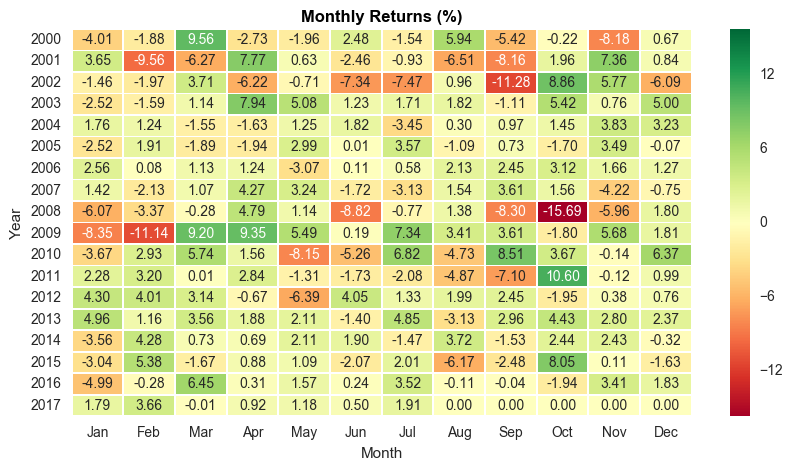

In [28]:
plt.figure(figsize=(10,8));
mrh.plot(dailyreturn)

 Plot กราฟของ Return เทียบกัน

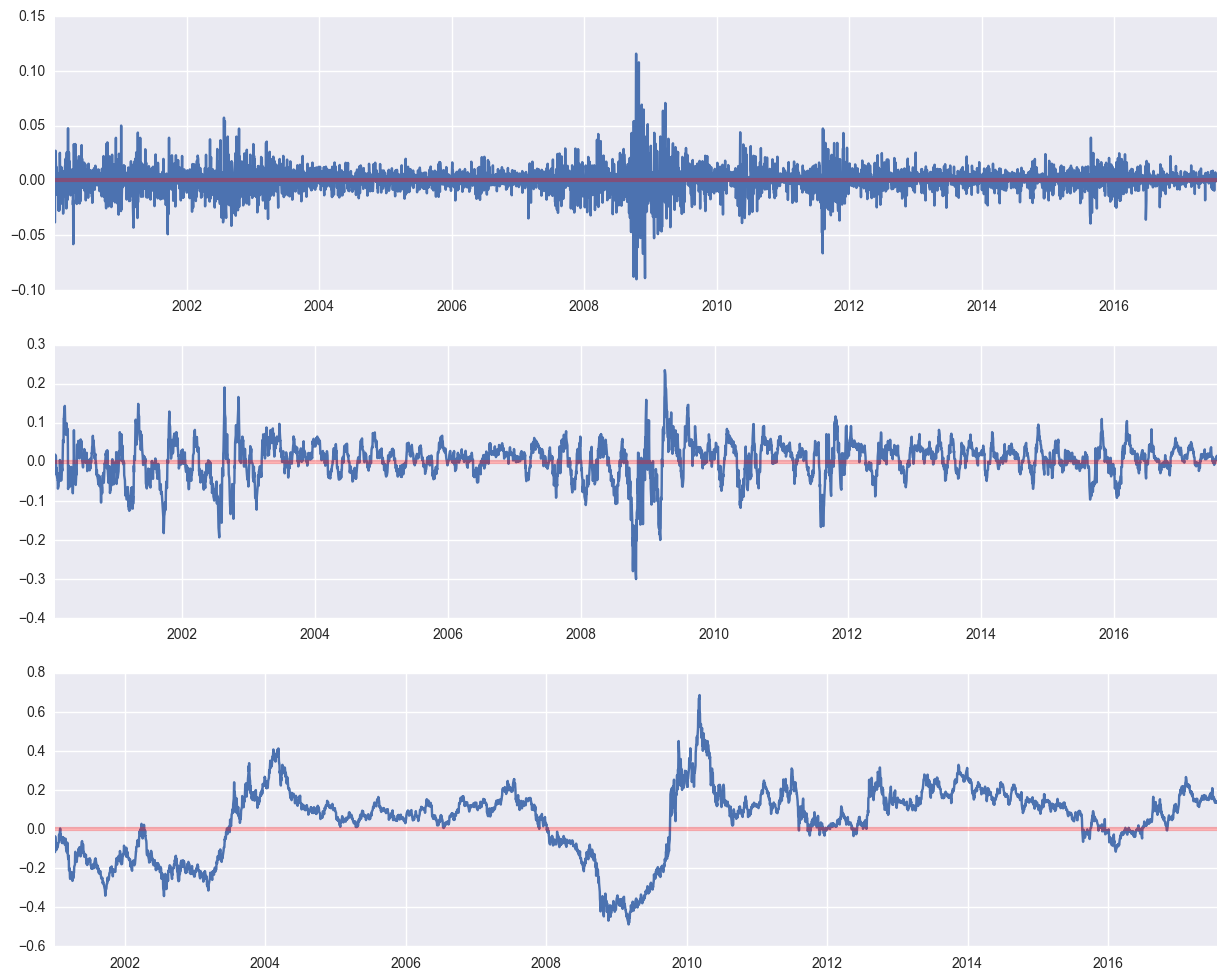

In [29]:
plt.figure(figsize=(15,12));
plt.subplot(311);
plt.plot(datareturn['DailyReturn']);
plt.axhline(y=0, linewidth=3,color='r',alpha=0.3);
plt.subplot(312);
plt.plot(datareturn['MonthlyReturn']);
plt.axhline(y=0, linewidth=3,color='r',alpha=0.3);
plt.subplot(313);
plt.plot(datareturn['AnnualReturn']);
plt.axhline(y=0, linewidth=3,color='r',alpha=0.3);

หาค่า Percentile ของ Return

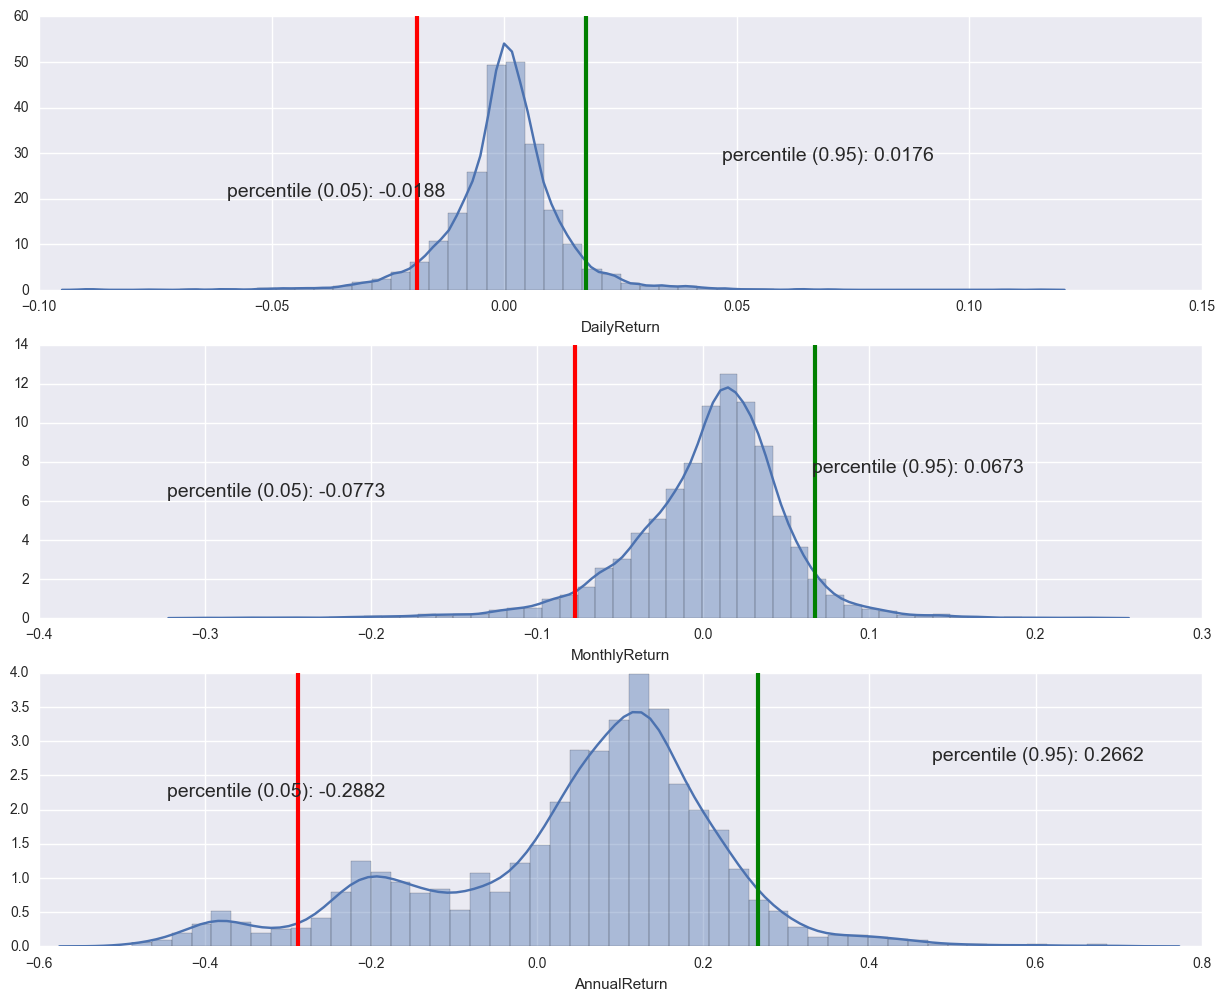

In [30]:
plt.figure(figsize=(15,12));
plt.subplot(311);
sns.distplot(datareturn['DailyReturn'].dropna());
p=np.percentile(datareturn['DailyReturn'].dropna(),5)
q=np.percentile(datareturn['DailyReturn'].dropna(),95)
plt.axvline(x=p, linewidth=3,color='r');
plt.axvline(x=q, linewidth=3,color='g');
plt.figtext(0.25,0.75,"percentile (0.05): %.4f" % p,fontsize=14);
plt.figtext(0.58,0.78,"percentile (0.95): %.4f" % q,fontsize=14);

plt.subplot(312);
sns.distplot(datareturn['MonthlyReturn'].dropna());
p=np.percentile(datareturn['MonthlyReturn'].dropna(),5)
q=np.percentile(datareturn['MonthlyReturn'].dropna(),95)
plt.axvline(x=p, linewidth=3,color='r');
plt.axvline(x=q, linewidth=3,color='g');
plt.figtext(0.21,0.50,"percentile (0.05): %.4f" % p,fontsize=14);
plt.figtext(0.64,0.52,"percentile (0.95): %.4f" % q,fontsize=14);

plt.subplot(313);
sns.distplot(datareturn['AnnualReturn'].dropna());
p=np.percentile(datareturn['AnnualReturn'].dropna(),5)
q=np.percentile(datareturn['AnnualReturn'].dropna(),95)
plt.axvline(x=p, linewidth=3,color='r');
plt.axvline(x=q, linewidth=3,color='g');
plt.figtext(0.21,0.25,"percentile (0.05): %.4f" % p,fontsize=14);
plt.figtext(0.72,0.28,"percentile (0.95): %.4f" % q,fontsize=14);

คำนวนหา Sharpe Ratio และ Volatility ของ Return

In [31]:
dailymean=datareturn['DailyReturn'].mean()
monthlymean=datareturn['MonthlyReturn'].mean()
annualmean=datareturn['AnnualReturn'].mean()
dailystd=datareturn['DailyReturn'].std()
monthlystd=datareturn['MonthlyReturn'].std()
annualstd=datareturn['AnnualReturn'].std()

dailysharpe=np.sqrt(252)*(dailymean/dailystd)
monthlysharpe=np.sqrt(252)*(monthlymean/monthlystd)
annualsharpe=np.sqrt(252)*(annualmean/annualstd)

print ("Daily Sharpe Ratio = ",dailysharpe,"| Volatility = ",dailystd);
print ("Monthly Sharpe Ratio = ",monthlysharpe,"| Volatility = ",monthlystd);
print ("Annual Sharpe Ratio = ",annualsharpe,"| Volatility = ",annualstd);

Daily Sharpe Ratio =  0.252443379218 | Volatility =  0.012268152058827449
Monthly Sharpe Ratio =  1.2582347775 | Volatility =  0.04670211282355883
Annual Sharpe Ratio =  4.12436421783 | Volatility =  0.17255807264427345


Plot กราฟเทียบ Risk/Return

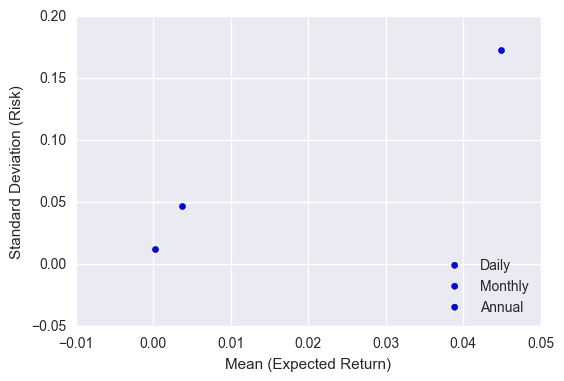

In [32]:
#plt.figure(figsize=(15,8));
daily=plt.scatter(dailymean,dailystd);
monthly=plt.scatter(monthlymean,monthlystd);
annual=plt.scatter(annualmean,annualstd);

plt.legend((daily,monthly,annual),('Daily','Monthly','Annual')
           ,loc='lower right',fontsize=10)
plt.xlabel('Mean (Expected Return)')
plt.ylabel('Standard Deviation (Risk)')
plt.show()

คำนวนและ Plot กราฟ ค่าเฉลี่ยของราคา

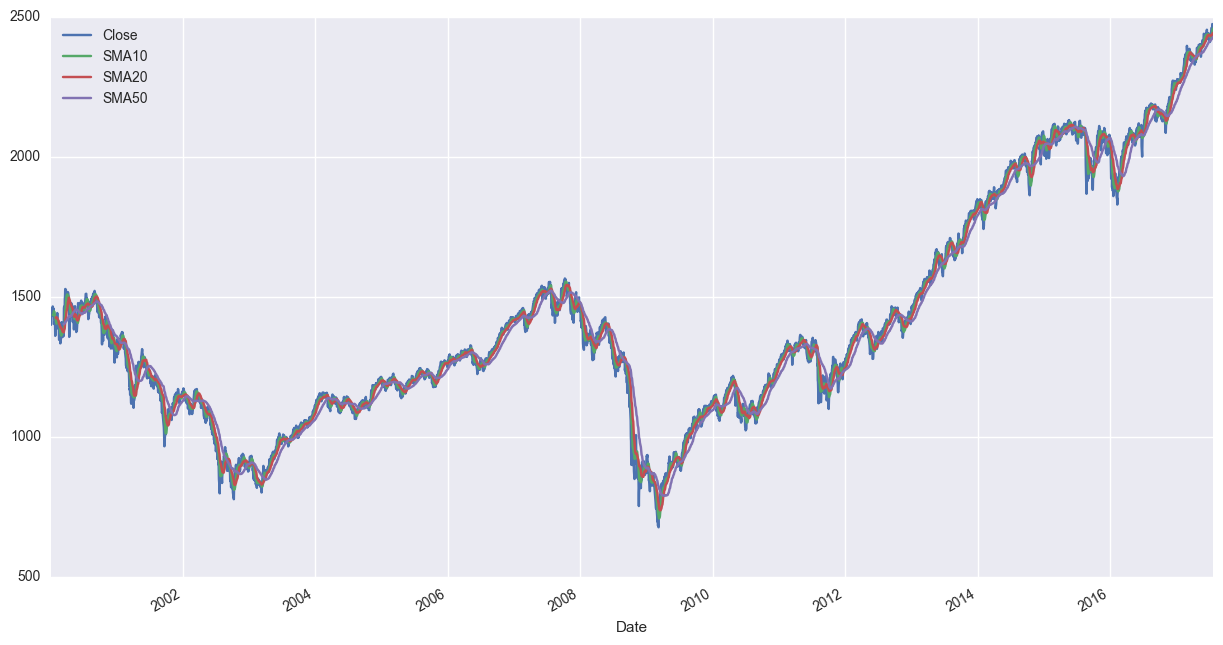

In [33]:
data=data.dropna() # ถ้าไม่ใส่ dropna จะทำให้ไม่สามารถรันได้เพราะติดค่า Nan
sma10 = data.rolling(10).mean()
sma20= data.rolling(20).mean()
sma50= data.rolling(50).mean()
bt.merge(data,sma10,sma20,sma50).plot(figsize=(15, 8));
plt.legend(('Close','SMA10','SMA20','SMA50')
           ,loc='upper left',fontsize=10);

กำหนด Class และ Strategy ในการทำ Backtest

In [34]:
class SelectWhere(bt.Algo):
    def __init__(self, signal):
        self.signal = signal
    def __call__(self, target):
        # get signal on target.now
        if target.now in self.signal.index:
            sig = self.signal.ix[target.now]
            selected = list(sig.index[sig])
            target.temp['selected'] = selected
        return True

In [35]:
# สร้าง algorithm--moving average ตัดกัน
def above_sma(btdata, sma_per=50, start= datestart, name='above_sma'):
    sma = data.rolling(sma_per).mean()
    s = bt.Strategy(name, [SelectWhere(data > sma),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])
    return bt.Backtest(s, data)

In [36]:
# สร้าง algorithm--long only
def long_only_ew(data, start=datestart, name='long_only_ew'):
    s = bt.Strategy(name, [bt.algos.RunOnce(),
                           bt.algos.SelectAll(),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])
    return bt.Backtest(s, data)

ทดสอบ Strategy 

In [37]:
sma10 = above_sma(data, sma_per=10, name='sma10')
sma20 = above_sma(data, sma_per=20, name='sma20')
sma50 = above_sma(data, sma_per=50, name='sma50')
benchmark = long_only_ew(data, name='LongOnly')

Run ผลการทดสอบ

In [38]:
result= bt.run(sma10,sma20,sma50,benchmark)

sma10
0% [#                             ] 100% | ETA: 00:00:06

/Users/joeaphiboon/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


0% [############################# ] 100% | ETA: 00:00:00sma20
0% [############################# ] 100% | ETA: 00:00:00sma50
0% [############################# ] 100% | ETA: 00:00:00LongOnly
0% [############################# ] 100% | ETA: 00:00:00

 Plot ผลการทดสอบ

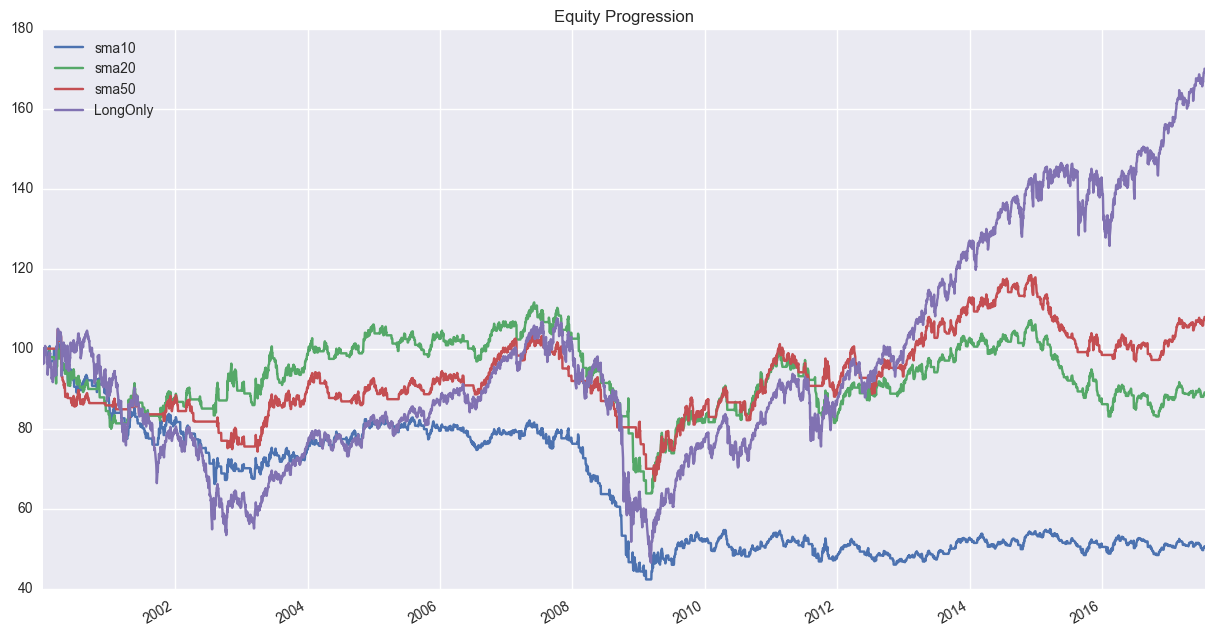

In [39]:
result.plot(figsize=(15,8));

In [40]:
result.display()

Stat                 sma10       sma20       sma50       LongOnly
-------------------  ----------  ----------  ----------  ----------
Start                2000-01-02  2000-01-02  2000-01-02  2000-01-02
End                  2017-07-24  2017-07-24  2017-07-24  2017-07-24
Risk-free rate       0.00%       0.00%       0.00%       0.00%

Total Return         -49.48%     -11.08%     7.75%       69.71%
Daily Sharpe         -0.26       -0.00       0.09        0.25
Daily Sortino        -0.25       -0.00       0.10        0.33
CAGR                 -3.81%      -0.67%      0.43%       3.06%
Max Drawdown         -58.61%     -42.81%     -36.06%     -56.76%
Calmar Ratio         -0.07       -0.02       0.01        0.05

MTD                  0.79%       1.09%       1.27%       1.92%
3m                   -1.18%      0.55%       2.30%       4.03%
6m                   0.40%       1.97%       5.21%       8.32%
YTD                  -0.36%      1.96%       7.15%       10.32%
1Y                   -4.05%      0